#  Movie Rating Prediction 
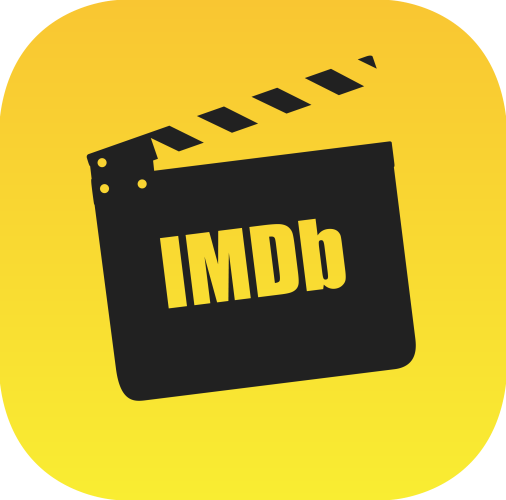)


**Project By: Moksh Jaiswal**

### Project Description:
Build a model that predicts the rating of a movie based on 
features like genre, director, and actors.Weu can use regressio 
techniques to tackle this proble The goal is to analyze historical movie data and develop a model 
that accurately estimates the rating given to a movie by users o 
critics.m.

### Project Contents
**Collecting Data📊:** Our initial step involves obtaining information from a dataset that includes details about varifeatures like movie name, release year, rating, director name etcived. I have obtained this dataset from Kaggle.

**Visualising Data📈📉:** We will closely inspect the data to enhance our understanding using the power of visualisation. This includes identifying and addressing any missing values while gaining insights from the available information.

**Preprocessing Data🔍🧹:** Recognizing that data can be disorganized, our next phase focuses on data wrangling, feature engineering and structuring the data in a format comprehensible to a computer.

**Constructing a Model⚙🏗:** Utilizing a computer program (model), we aim to enable it to learn from the data. The objective is for the model to recognize patterns indicative of whether a Titanic passenger survived.

**Testing the Model🧪:** To validate the effectiveness of our model, we will assess its performance using a distinct dataset that it hasn't encountered previously. This evaluation will gauge the accuracy of our model in making predictions.assengers.

In [1]:
# Importing libraries and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv(r'C:\Users\pc\CodSoft\Data Science Projects\Task2-Movie Rating Prediction\IMDb Movies India.csv', encoding='latin')

In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


There are many missing values in most of the columns.

In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


As Rating is the only numeric column we see the description only for that. It can se seen that the minimum rating is 1.1 while the maximum is 10.

## Data Wrangling

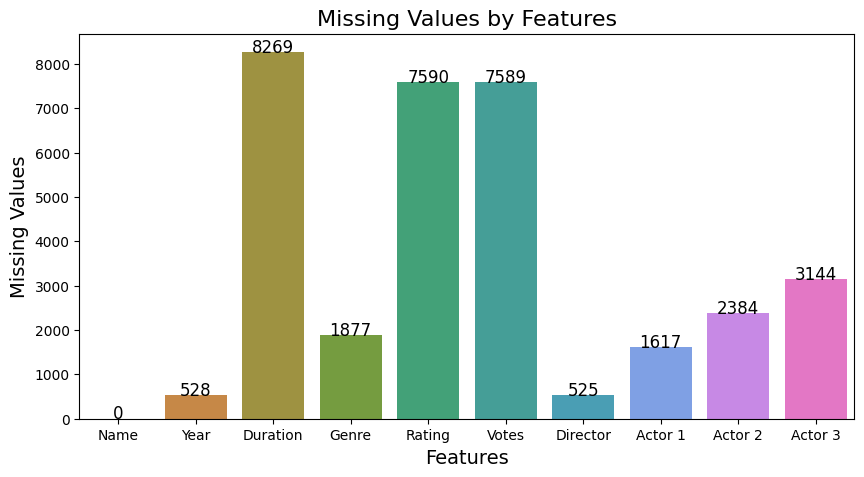

In [7]:
missing_data = df.isna().sum().reset_index()
missing_data.columns = ['Column', 'Missing Value']

plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Column', y = 'Missing Value', data = missing_data, palette = 'husl')

for p in ax.patches:
    height=p.get_height()
    rounded_height = round(height)
    
    ax.annotate(f"{rounded_height}", (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('Missing Values by Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Missing Values', fontsize=14)
plt.grid(False)
plt.show()

In [8]:
# Calculating percentage of missing values
null_counts = df.isna().sum()

null_percentages = (null_counts / len(df)) * 100
null_percentages_str = null_percentages.round(2).astype(str) + '%'

null_summary = pd.DataFrame({'Null Counts': null_counts, 'Null Percentage': null_percentages_str}).reset_index()

null_data = null_summary.rename(columns={'index': 'Column'})
null_data

,Column,Null Counts,Null Percentage
0,Name,0,0.0%
1,Year,528,3.4%
2,Duration,8269,53.32%
3,Genre,1877,12.1%
4,Rating,7590,48.94%
5,Votes,7589,48.93%
6,Director,525,3.39%
7,Actor 1,1617,10.43%
8,Actor 2,2384,15.37%
9,Actor 3,3144,20.27%


In [9]:
# Viewing the data
for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*100, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ---------------------------------------------------------------------------------------------------- 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(19

In [10]:
# Cleaning the Name column to extract only the alphabets
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5652 non-null   object 
 1   Year      5652 non-null   object 
 2   Duration  5652 non-null   object 
 3   Genre     5652 non-null   object 
 4   Rating    5652 non-null   float64
 5   Votes     5652 non-null   object 
 6   Director  5652 non-null   object 
 7   Actor 1   5652 non-null   object 
 8   Actor 2   5652 non-null   object 
 9   Actor 3   5652 non-null   object 
dtypes: float64(1), object(9)
memory usage: 485.7+ KB


In [13]:
# Remove non-numeric characters from the 'Votes' column
df['Votes'] = df['Votes'].str.replace(',', '').str.extract('(\d+)')

# Convert the 'Votes' column to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [14]:
# Cleaning the Year, Duration and Votes columns
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r'min', '', regex=True)

In [15]:
df['Rating'] = df['Rating'].astype(int)
df['Duration'] = df['Duration'].astype(float)
df['Year'] = df['Year'].astype(int)

In [16]:
# Splitting the genre column
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

# Replacing the null values with the mode value
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [17]:
df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109.0,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110.0,Comedy,4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110.0,Romance,4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Comedy,4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Drama,4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147.0,Musical,4,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142.0,Drama,7,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,Yahaan,2005,142.0,Romance,7,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,Yahaan,2005,142.0,War,7,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82.0,Horror,5,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)
df.shape

(5646, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5646 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5646 non-null   object 
 1   Year      5646 non-null   int32  
 2   Duration  5646 non-null   float64
 3   Genre     5646 non-null   object 
 4   Rating    5646 non-null   int32  
 5   Votes     5646 non-null   int64  
 6   Director  5646 non-null   object 
 7   Actor 1   5646 non-null   object 
 8   Actor 2   5646 non-null   object 
 9   Actor 3   5646 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 441.1+ KB


## Exploratory Data Analysis

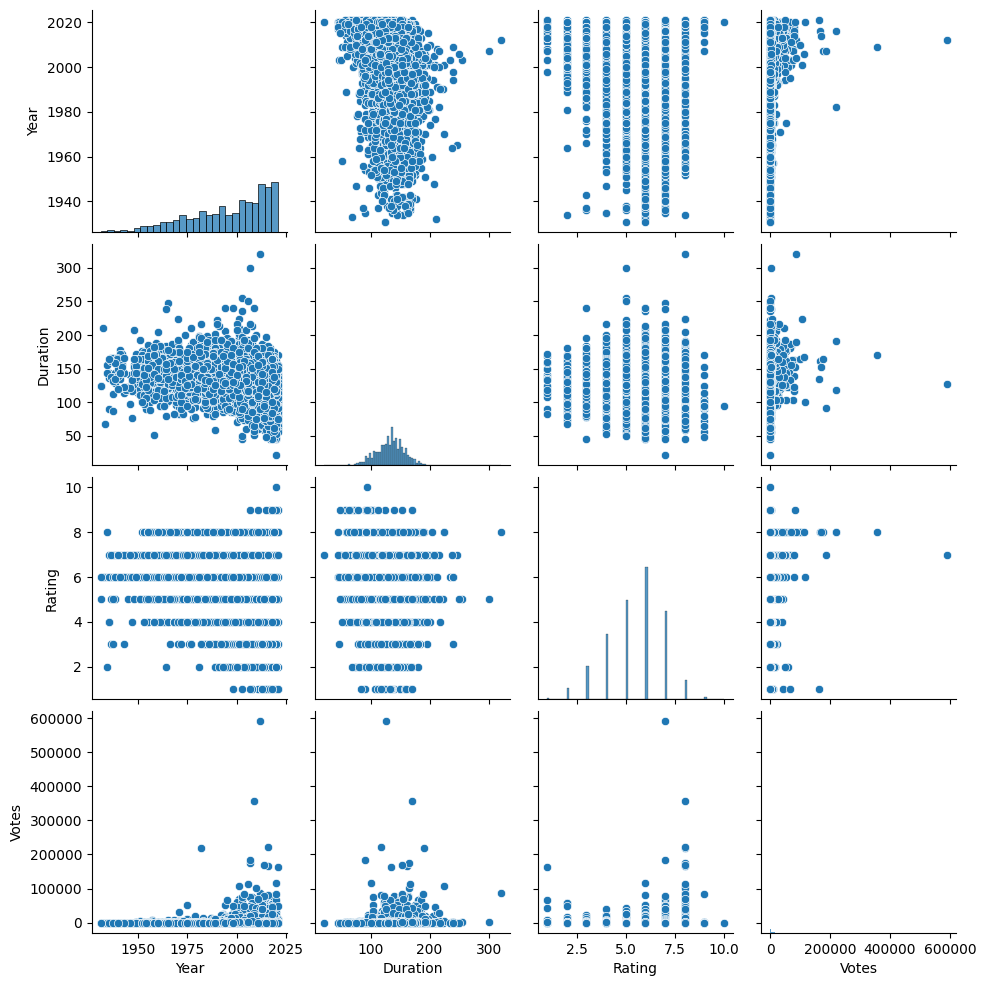

In [20]:
sns.pairplot(df)
plt.grid(False)
plt.show()

Let's create separate distribution plots to understand better.

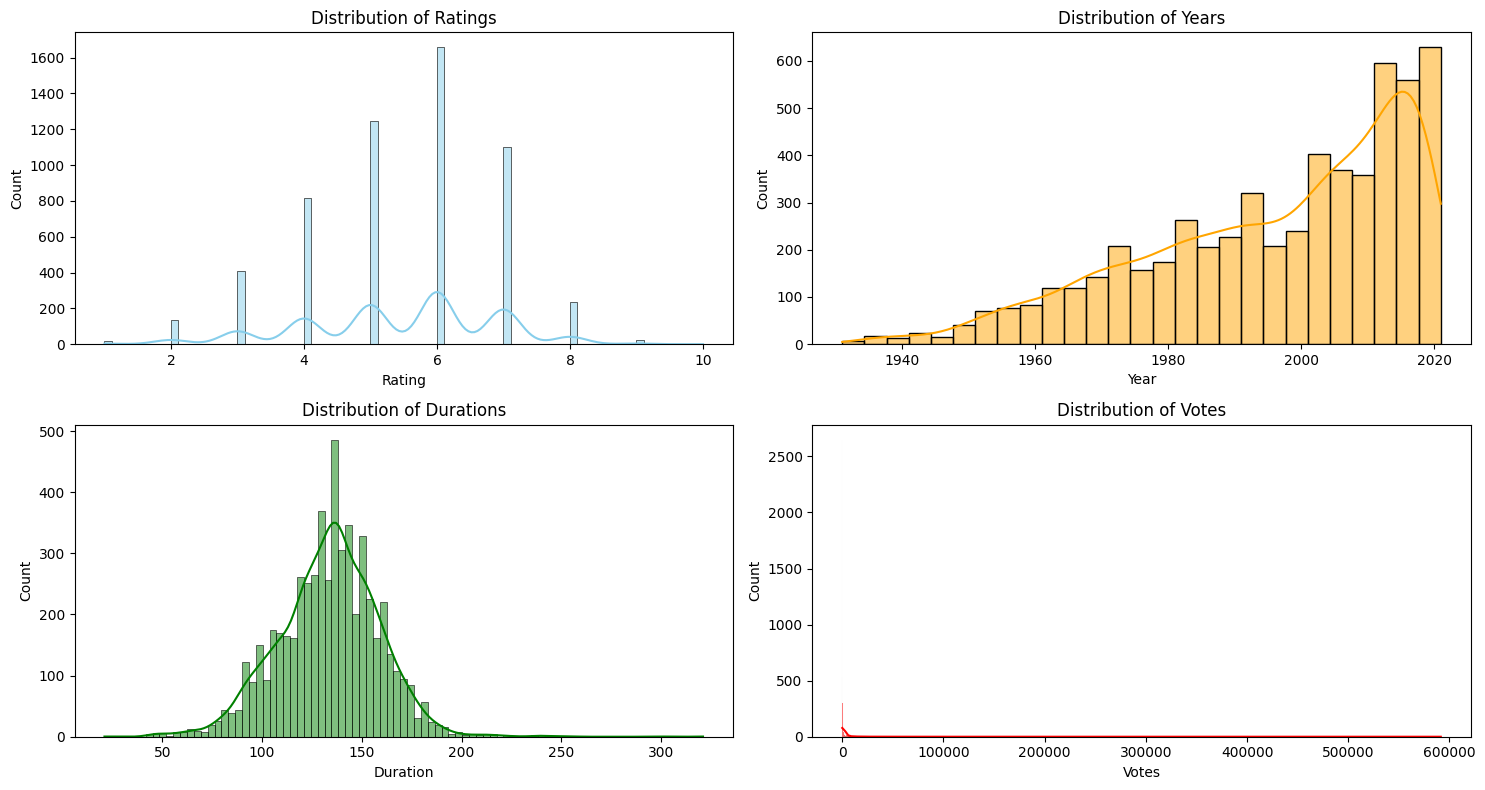

In [21]:
# Plot distribution plots
plt.figure(figsize=(15, 8))

# Distribution plot for 'Rating'
plt.subplot(2, 2, 1)
sns.histplot(df['Rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.grid(False)

# Distribution plot for 'Year'
plt.subplot(2, 2, 2)
sns.histplot(df['Year'], kde=True, color='orange')
plt.title('Distribution of Years')
plt.grid(False)

# Distribution plot for 'Duration'
plt.subplot(2, 2, 3)
sns.histplot(df['Duration'], kde=True, color='green')
plt.title('Distribution of Durations')
plt.grid(False)

# Distribution plot for 'Votes'
plt.subplot(2, 2, 4)
sns.histplot(df['Votes'], kde=True, color='red')
plt.title('Distribution of Votes')
plt.grid(False)

plt.tight_layout()
plt.show()

It looks as if the range of values in Votes is very vast. Let's check for outliers using boxplot 

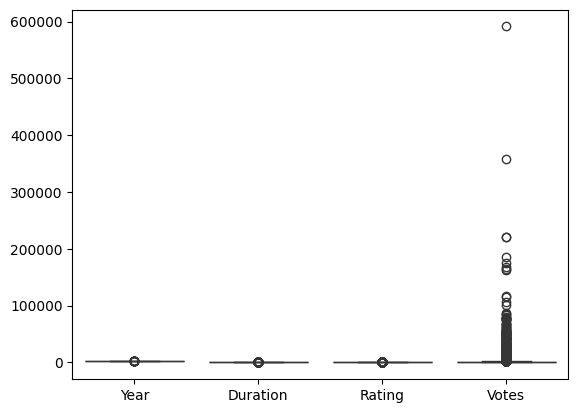

In [22]:
sns.boxplot(df, palette = 'winter')
plt.show()

There are many outliers in the Votes feature.

In [23]:
df['Votes'].describe()

count      5646.000000
mean       2698.274885
std       13664.440002
min           5.000000
25%          30.000000
50%         131.000000
75%         920.500000
max      591417.000000
Name: Votes, dtype: float64

We can see that the minimum value for Votes is 5 while the maximum is 5,91,417 which is extremely high. We will have to standardise the Votes before using it for model building. We will do that later after performing more exploratary data analysis.

#### Correlation Heatmap

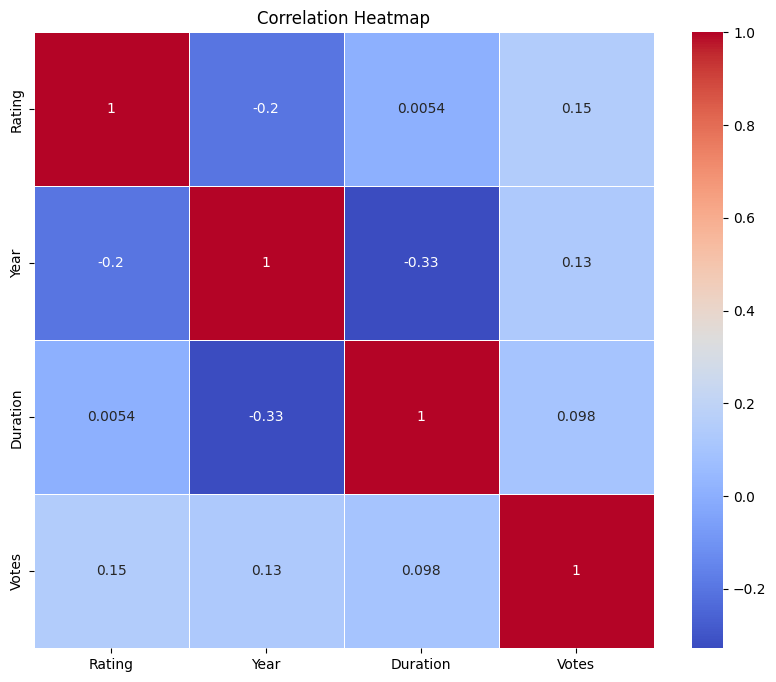

In [24]:
correlation_matrix = df[['Rating', 'Year', 'Duration', 'Votes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

We don't notice any significant correlation however, **Duration is weakly negatively correlated with Year.**

#### Top 10 Years with most number of Movies.

In [25]:
# Counting the number of movies for each year
year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']
year_count

,Year,Count
0,2019,226
1,2017,210
2,2018,200
3,2015,176
4,2016,173
...,...,...
86,1931,2
87,1939,2
88,1934,2
89,1933,1


In [26]:
# Sort the DataFrame by 'Count' in descending order
df_sorted = year_count.sort_values(by='Count', ascending=False)

# Convert 'Year' to a categorical variable with a specified order
order = df_sorted['Year'].tolist()
df_sorted['Year'] = pd.Categorical(df_sorted['Year'], categories=order, ordered=True)

# Ensuring 'Year' column is of integer type
df_sorted['Year'] = df_sorted['Year'].astype(int)

In [27]:
# Top 10 Years with most number of movies
year_count_top10 = df_sorted.head(10)
year_count_top10

,Year,Count
0,2019,226
1,2017,210
2,2018,200
3,2015,176
4,2016,173
5,2013,167
6,2014,163
7,2005,141
8,2012,140
9,2020,140


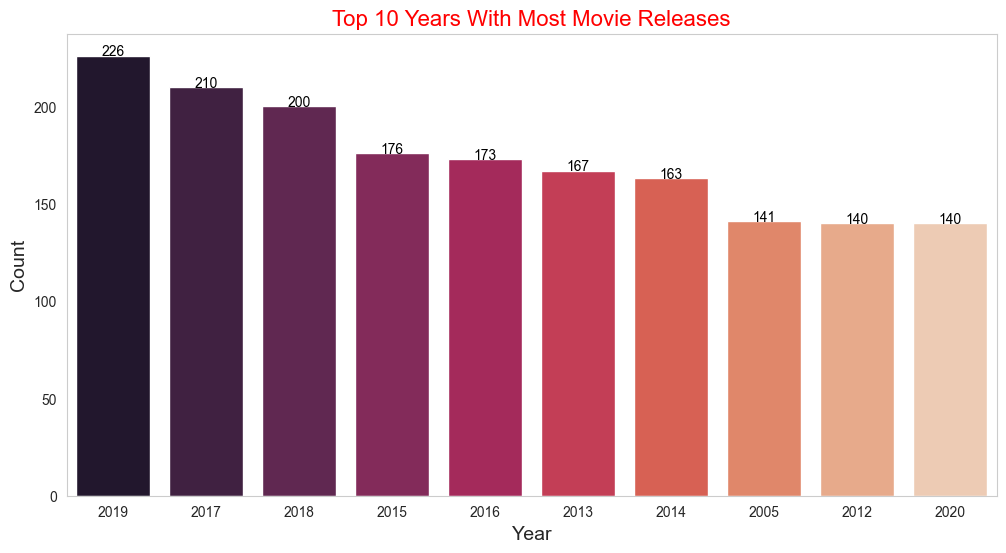

In [28]:
plt.figure(figsize=(12, 6))

# Setting Style
sns.set_style('whitegrid')

# Plotting a Bar plot for top 10 years
bar_plot = sns.barplot(x = 'Year', y = 'Count', data = year_count_top10, palette = 'rocket', order=year_count_top10['Year'])

# Add data labels
for p in bar_plot.patches:
    rounded_labels = round(p.get_height())
    bar_plot.annotate(f"{rounded_labels}", (p.get_x() + p.get_width()/2, p.get_height()), 
                      ha='center', va='baseline', fontsize=10, color='black')

# Cutomising the plot
plt.title('Top 10 Years With Most Movie Releases', fontsize=16, color='r')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)

# Showing the plot
plt.show()

Most number of movies were released in the year 2019 followed by 2017 and then 2018. Suprisingly, the year 2020 has very less number of movies.

We don't observe a perectlty linear rise in the number of movies along the years. Let's check the release trends over the years.

#### Release Trends Over the Years

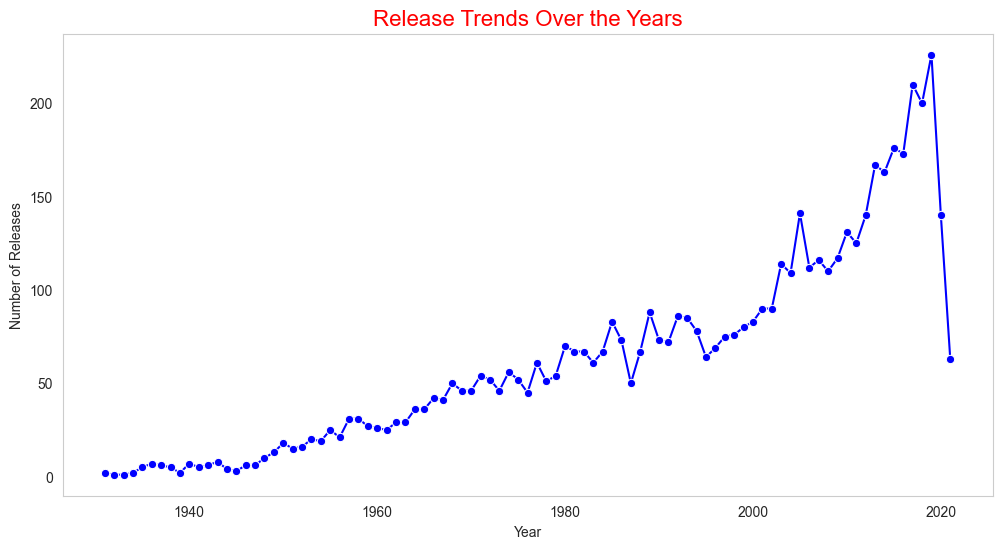

In [29]:
release_trends = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trends.index, y=release_trends.values, marker='o', color='blue')

plt.title('Release Trends Over the Years', fontsize=16, color='r')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(False)

plt.show()

It is evident that the number of movies released increases as the years pass along.

#### Top 10 most popular Genres by most number of Movies

In [30]:
# Grouping the Genres and counting their number of occurences
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

In [31]:
# Converting the list values into strings
genre_counts['Genre'] = genre_counts['Genre']

In [32]:
genre_counts

,Genre,Count
0,Drama,1841
1,Action,1646
2,Comedy,988
3,Crime,271
4,Romance,159
5,Horror,126
6,Adventure,105
7,Musical,90
8,Thriller,88
9,Biography,83


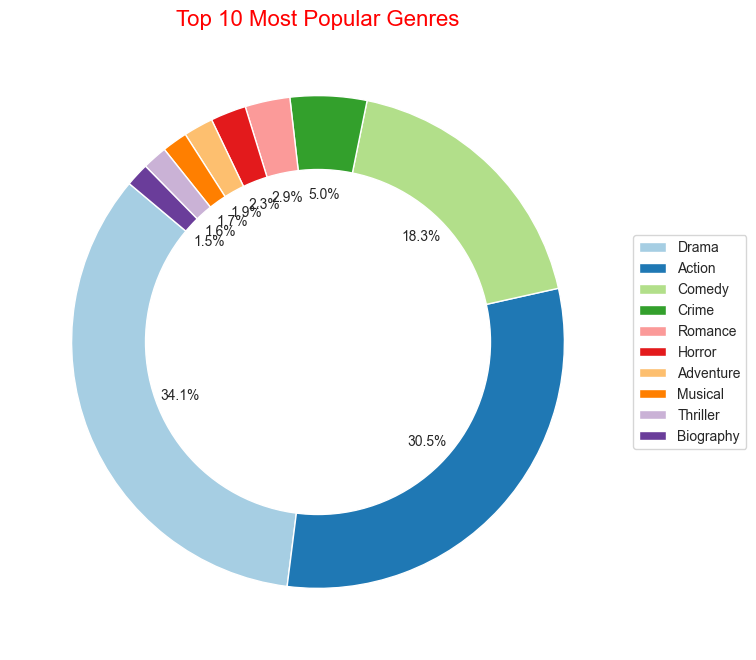

In [33]:
# Create a pie plot
plt.figure(figsize=(8, 8))

# Use values instead of string literals for 'Count' and 'Genre'
plt.pie(genre_counts['Count'].head(10), labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legends on the right side
plt.legend(genre_counts['Genre'].head(10), bbox_to_anchor=(1, 0.5), loc="center left")

# Remove labels
plt.gca().set_ylabel('')

# Customize the plot
plt.title('Top 10 Most Popular Genres', fontsize=16, color='r')
plt.show()

Most popular genre is obviously the one with the most number of movies. We can witness, out of all the 22 movies, **Drama** is the most popular genre followed by **Action, Comedy, Crime** and **Romance** making them the 5 most popular genres.

#### Top Actor Analysis

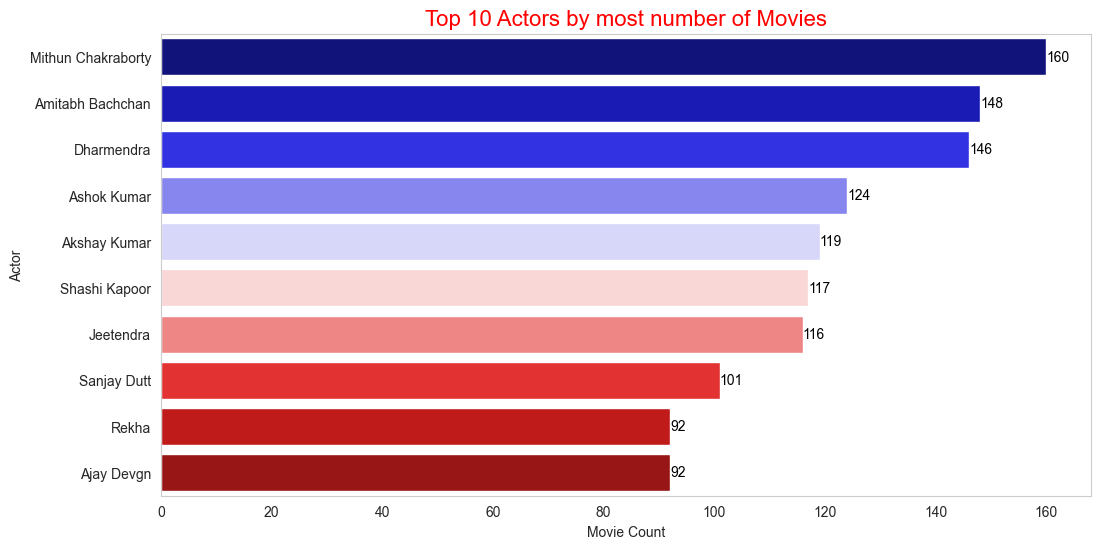

In [34]:
# Top Actor Analysis
top_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).value_counts().head(10)

# Plotting and customising the graph
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_actors.values, y=top_actors.index, palette='seismic')

plt.title('Top 10 Actors by most number of Movies', fontsize=16, color='r')
plt.xlabel('Movie Count')
plt.ylabel('Actor')

# Adding data labels to the bars
for index, value in enumerate(top_actors.values):
    bar_plot.text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.grid(False)
plt.show()

It appears that **Mithun Chakraborty** has done the most number of movies followed by **Amitabh Bachchan** and **Dharmendra**.

#### Top Rated Movies

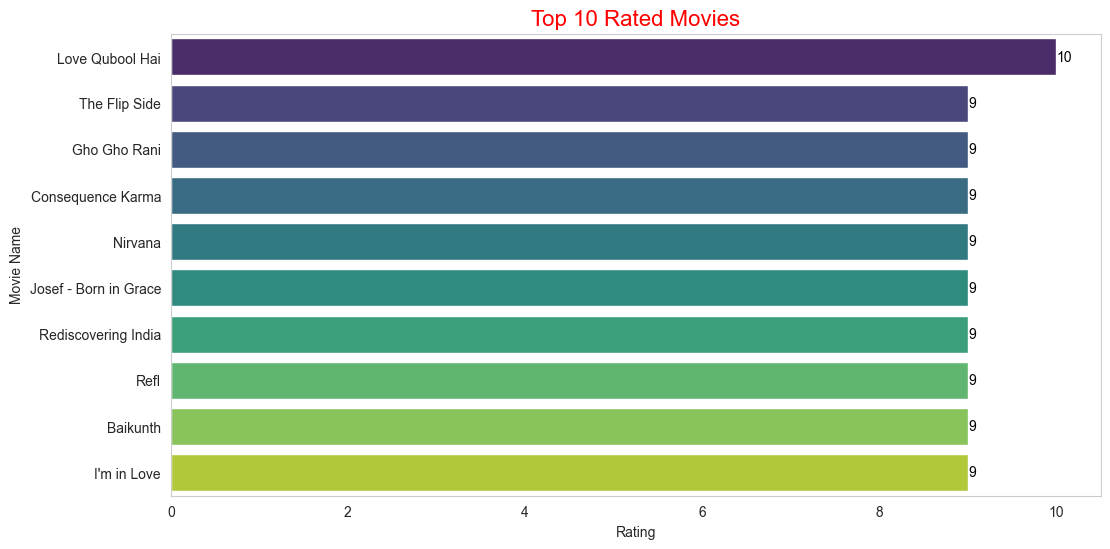

In [35]:
# Top Rated Movies
top_rated_movies = df.sort_values(by='Rating', ascending=False).head(10)

# Plotting and Customising the graph
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Rating', y='Name', data=top_rated_movies, palette='viridis')

plt.title('Top 10 Rated Movies', fontsize=16, color='r')
plt.xlabel('Rating')
plt.ylabel('Movie Name')

# Adding data labels to the bars
for index, value in enumerate(top_rated_movies['Rating']):
    bar_plot.text(value, index, f'{value:.0f}', ha='left', va='center', fontsize=10, color='black')

plt.grid(False)
plt.show()

The highest rated Movie is only one among all the 5646 movies which is **Love Qubool Hai**. After that follows a long list tof movies with the same score.

**Also, the top movies by rating are not the ones starring the most popular actors. This can be due to the reason that as these movies are not so popular, a very less number of people must have watched them resulting in hiigher rating than most other popular movies.**

#### Top Rated Directors

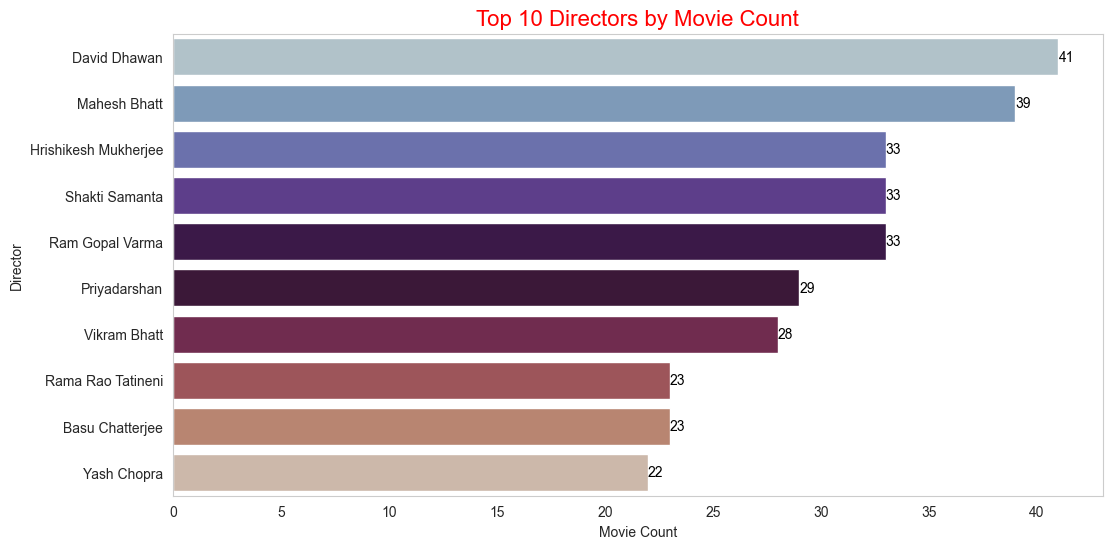

In [36]:
# Top Rated Directors
top_directors = df['Director'].value_counts().head(10)

# Plotting and Customising the graph
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_directors.values, y=top_directors.index, palette='twilight')

plt.title('Top 10 Directors by Movie Count', fontsize=16, color='r')
plt.xlabel('Movie Count')
plt.ylabel('Director')

# Adding data labels to the bars
for index, value in enumerate(top_directors.values):
    bar_plot.text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.grid(False)
plt.show()

It can be seen that the Directors with the most number of movies is toped by **David Dhawan** having slightly a higher number than **Mahesh Bhatt**, followed by **Hrishikesh Mukherjee** teing with **Shakti Samanta** and **Ram Gopal Varma**.

#### Directors with Highest Average Rating

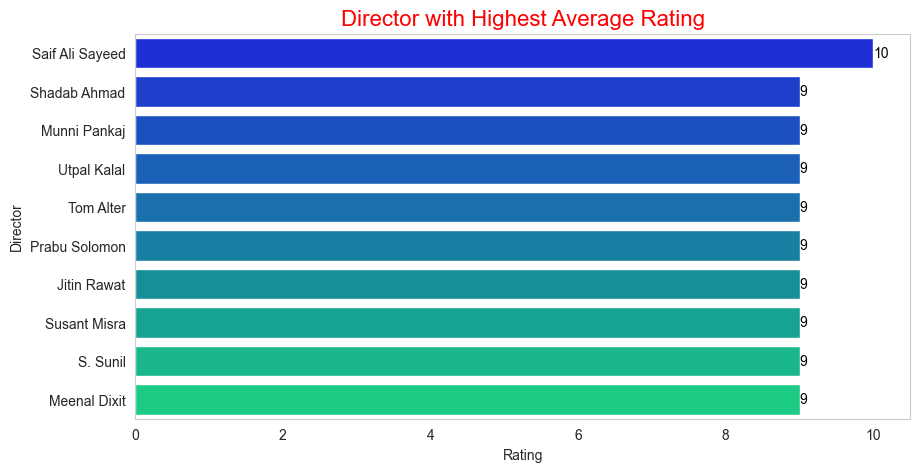

In [37]:
director_avg_rating = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10).to_frame()

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Rating', y='Director', data=director_avg_rating, palette='winter')

plt.title('Director with Highest Average Rating', fontsize=16, color='r')

# Adding data labels to the bars
for index, value in enumerate(director_avg_rating['Rating']):
    bar_plot.text(value, index, f'{value:.0f}', ha='left', va='center', fontsize=10, color='black')

plt.grid(False)
plt.show()

It seems that directors with the highest average rating are not the ones with the most number of movies. This again, can be because they might not have more of the less rated of movies as they overall have less number of movies.

The highest average rated movie director is **Saif Ali Sayeed**. Then comes many directors with the same rating securing a tie for the second position.

#### Word Clouds for Movie names, Directors and Actors

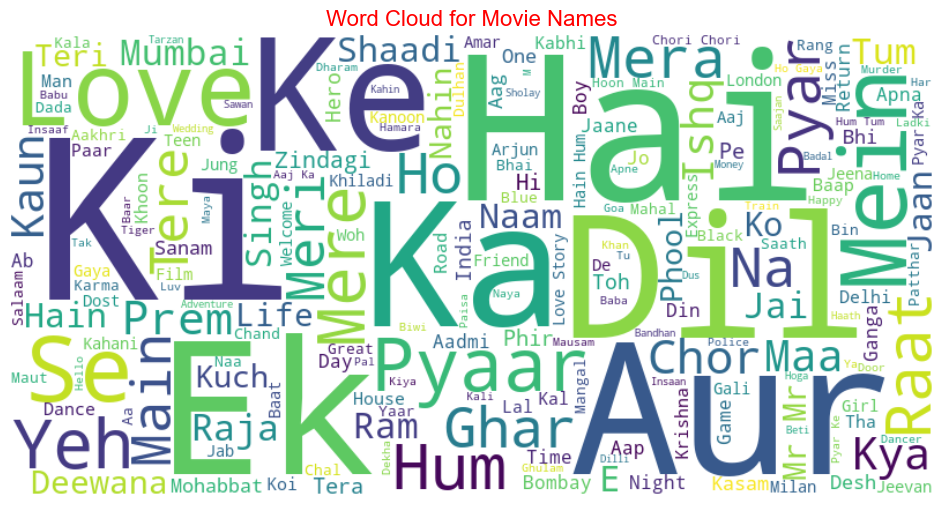

In [38]:
from wordcloud import WordCloud

# Word Cloud for Movie names
wordcloud_name = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Name']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_name, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Names', fontsize=16, color='r')
plt.show()   

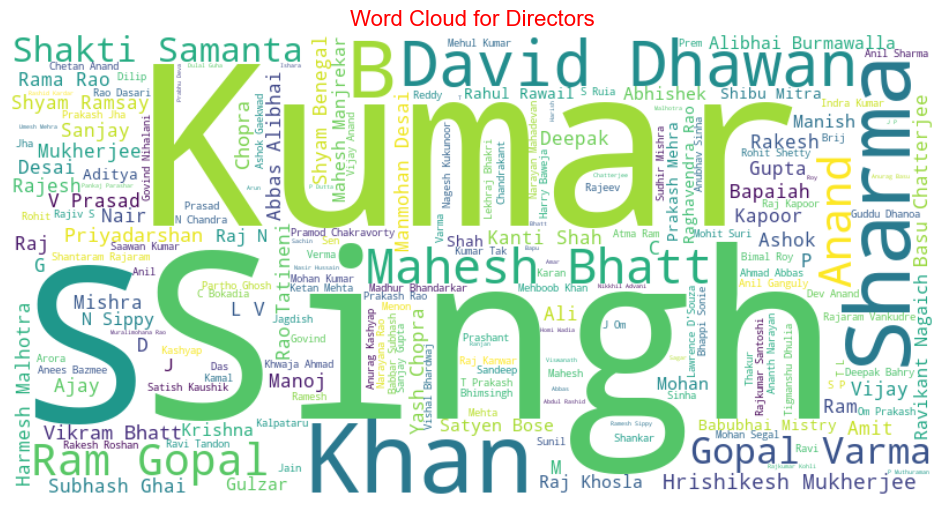

In [39]:
# Word Cloud for directors
wordcloud_director = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Director']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_director, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Directors', fontsize=16, color='r')
plt.show()

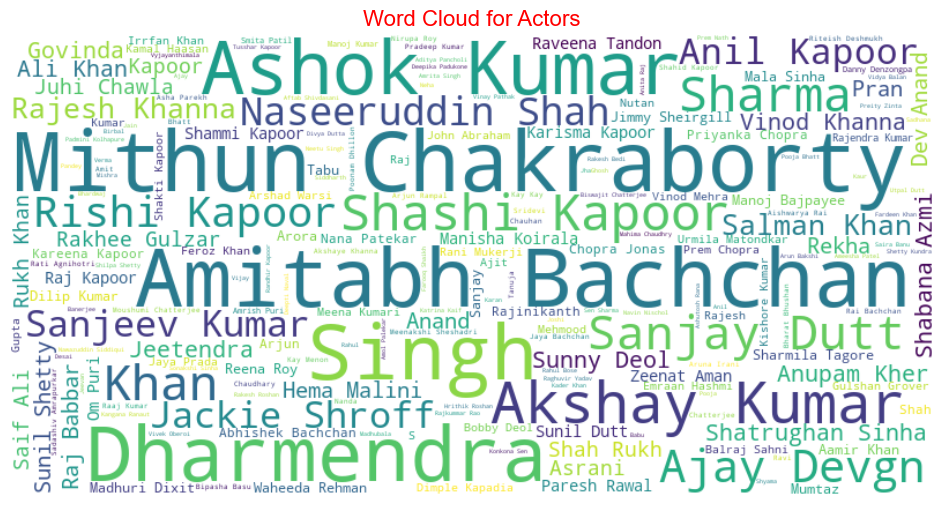

In [40]:
# Word Cloud for Actors
wordcloud_actors = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Actor 1'] + ' ' + df['Actor 2'] + ' ' + df['Actor 3']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_actors, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Actors', fontsize=16, color='r')
plt.show()

#### Director and Genre Associations

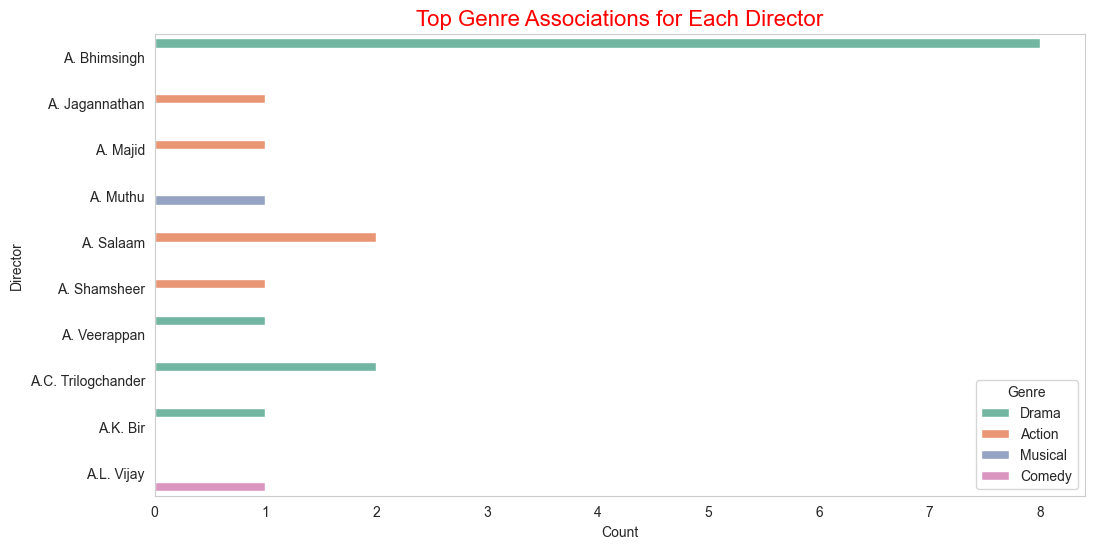

In [41]:
director_genre_associations = df.groupby('Director')['Genre'].value_counts().reset_index(name='Count')
top_director_genre_associations = director_genre_associations.groupby('Director').apply(lambda x: x.nlargest(1, 'Count'))

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Director', hue='Genre', data=top_director_genre_associations.head(10), dodge=True, palette='Set2')
plt.title('Top Genre Associations for Each Director', fontsize=16, color='r')
plt.xlabel('Count')
plt.ylabel('Director')
plt.grid(False)
plt.show()

The above chart depicts which directors prefer which over others. It seems that the director Bhimsingh really enjoys making a Dramatic movie. This could again be because of it being the most popular genre among the people gives it more chance of being a successful movie.

#### Genre trends over Years

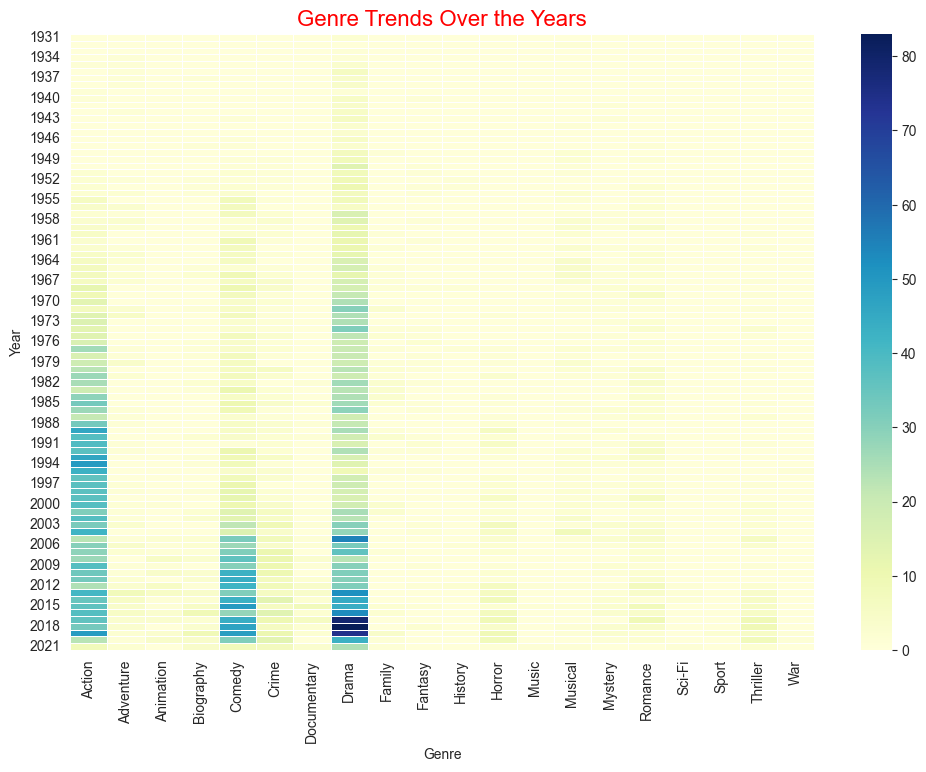

In [42]:
genre_trends = df.groupby('Year')['Genre'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(genre_trends, cmap='YlGnBu', linewidths=.5)
plt.title('Genre Trends Over the Years', fontsize=16, color='r')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

We notice the increase in trend over the years only for three genres in particular namely **Action, Comedy and Drama**.

However, we can see that **Drama** and **Action** started getting popular after the year **1970** where *Drama being the most popular from 2015 to 2018* while, it was not until after the year **2000** that people started liking **Comedy**.

#### Top 10 Actors Collaborations

In [43]:
# Create a DataFrame to store actor collaborations
actor_collaborations = pd.DataFrame(columns=['Actor 1', 'Actor 2', 'Collaboration Count'])

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract actors from the row
    actors = [row['Actor 1'], row['Actor 2'], row['Actor 3']]
    
    # Generate unique pairs of actors
    actor_pairs = [(actors[i], actors[j]) for i in range(len(actors)) for j in range(i+1, len(actors))]
    
    # Update the collaboration count in the actor_collaborations DataFrame
    for pair in actor_pairs:
        if not actor_collaborations[((actor_collaborations['Actor 1'] == pair[0]) & (actor_collaborations['Actor 2'] == pair[1]))
            | ((actor_collaborations['Actor 1'] == pair[1]) & (actor_collaborations['Actor 2'] == pair[0]))].empty:
            actor_collaborations.loc[((actor_collaborations['Actor 1'] == pair[0]) & (actor_collaborations['Actor 2'] == pair[1]))
            | ((actor_collaborations['Actor 1'] == pair[1]) & (actor_collaborations['Actor 2'] == pair[0])), 'Collaboration Count'] += 1
        else:
            actor_collaborations = actor_collaborations.append({'Actor 1': pair[0], 'Actor 2': pair[1], 'Collaboration Count': 1},
                                                               ignore_index=True)

# Sort the actor_collaborations DataFrame by 'Collaboration Count' in descending order
top_actor_collaborations = actor_collaborations.sort_values(by='Collaboration Count', ascending=False).head(10)

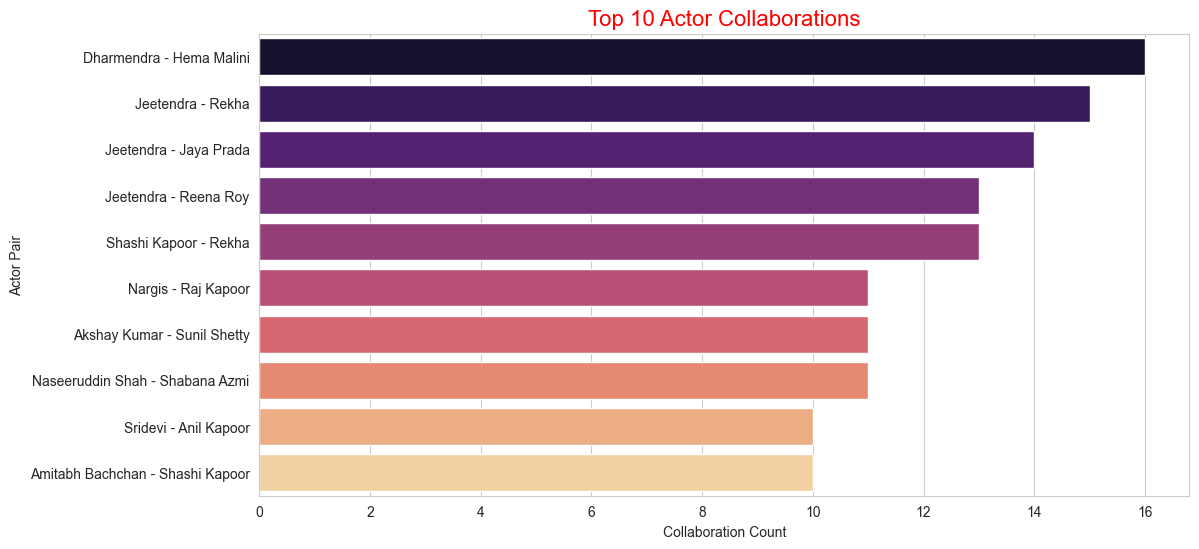

In [44]:
# Plot the top 10 actor collaborations
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Collaboration Count', y=['{} - {}'.format(actor[0], actor[1]) for actor in zip(top_actor_collaborations['Actor 1'],
                                                                                                         top_actor_collaborations['Actor 2'])], data=top_actor_collaborations, palette='magma')
plt.title('Top 10 Actor Collaborations', fontsize=16, color='r')
plt.xlabel('Collaboration Count')
plt.ylabel('Actor Pair')
plt.show()

## Preprocessing
Here we are going to transform all the categorical data into numerical data, standardise the data and drop the 'Name' column and build a predictive model and check if the result is satisfactory as it might not have a significant impact on the movie ratings.

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features using label encoding for directors and actors
label_encoder = LabelEncoder()
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

# One-hot encode genres
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

## Splitting the data into Train and Test data

In [46]:
from sklearn.model_selection import train_test_split

# Drop the 'Name' column
df = df.drop('Name', axis=1)

# Separate features and target variable
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardisation

In [47]:
# Standardize numerical features
numerical_features = ['Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [48]:
X_train.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War
4156,1.103915,-1.250550,-0.188829,-0.599506,0.579666,0.765008,-1.477296,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13351,0.646648,-1.567620,-0.190850,0.930635,-0.475342,0.649372,-1.596895,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12944,1.002300,-0.338975,-0.189317,-1.466585,1.021917,1.323669,-1.439747,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12590,-0.064657,-0.061539,-0.189735,0.665411,1.332736,0.099721,1.642020,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10843,-0.623539,0.968937,-0.190989,0.043154,-0.946011,1.060858,-1.290944,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building Machine Learning Models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)
print(f'Linear Regression Mean Squared Error: {mse_linear}, R-squared: {r2_linear}')

# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}, R-squared: {r2_gb}')

# XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
r2_xgb = r2_score(y_test, y_xgb_pred)
print(f'XGBoost Mean Squared Error: {mse_xgb}, R-squared: {r2_xgb}')

# RandomForest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
print(f'Random Forest Mean Squared Error: {mse_rf}, R-squared: {r2_rf}')

# AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
y_adaboost_pred = adaboost_model.predict(X_test)
mse_adaboost = mean_squared_error(y_test, y_adaboost_pred)
r2_adaboost = r2_score(y_test, y_adaboost_pred)
print(f'AdaBoost Mean Squared Error: {mse_adaboost}, R-squared: {r2_adaboost}')

Linear Regression Mean Squared Error: 1.7273927489798662, R-squared: 0.1461233077772338
Gradient Boosting Mean Squared Error: 1.302935360767296, R-squared: 0.3559390956752113
XGBoost Mean Squared Error: 1.463816454209262, R-squared: 0.2764131071641823
Random Forest Mean Squared Error: 1.3219889380530971, R-squared: 0.3465206206020591
AdaBoost Mean Squared Error: 1.6558490676205626, R-squared: 0.18148844522185892


## Conclusion

Based on the provided output, let's analyze the performance of each model:

1. **Linear Regression:**
   - Mean Squared Error (MSE): 1.7274
   - R-squared: 0.1461
   - The Linear Regression model has a relatively higher MSE and lower R-squared compared to other models, indicating a weaker fit.

2. **Gradient Boosting:**
   - Mean Squared Error (MSE): 1.3029
   - R-squared: 0.3559
   - The Gradient Boosting model has a lower MSE and higher R-squared, suggesting better predictive performance compared to Linear Regression.

3. **XGBoost:**
   - Mean Squared Error (MSE): 1.4638
   - R-squared: 0.2764
   - The XGBoost model falls between Linear Regression and Gradient Boosting in terms of performance metrics.

4. **Random Forest:**
   - Mean Squared Error (MSE): 1.3220
   - R-squared: 0.3465
   - The Random Forest model performs similarly to Gradient Boosting in terms of MSE and R-squared.

5. **AdaBoost:**
   - Mean Squared Error (MSE): 1.6558
   - R-squared: 0.1815
   - AdaBoost has a higher MSE and lower R-squared compared to other models, indicating a weaker fit.

#### Summary
- Based on MSE alone, Gradient Boosting has the lowest error, making it the best performer in terms of reducing the squared differences between predicted and actual values.
- R-squared provides a measure of how well the model explains the variance. Gradient Boosting has the highest R-squared, suggesting that it captures more variability in the target variable compared to other models.

**It seems like Gradient Boosting is the best-performing model among the ones you've evaluated. However, keeping in mind the context of our specific problem and consider the trade-offs between model complexity, interpretability, and performance.**

## Hyperparameter tuning, Cross Validation and Important Features
Here, we will perform Hyperparameter tuning and Cross Validation and then compare the results to check if the model improves in terms of performance. We will also determine the top features.

In [50]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [51]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Evaluate the model with best hyperparameters
best_gb_model = grid_search.best_estimator_
y_gb_pred = best_gb_model.predict(X_test)

# Print evaluation metrics
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}, R-squared: {r2_gb}')

# Feature Importance Analysis
feature_importance = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top features
print('\nTop Features:')
print(sorted_feature_importance.head(10))

# Cross-Validation
cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()
print(f'\nCross-Validation Mean Squared Error: {cv_mse_mean}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Gradient Boosting Mean Squared Error: 1.3078671589214954, R-squared: 0.3535012323131559

Top Features:
              Feature  Importance
2               Votes    0.267492
0                Year    0.265040
4             Actor 1    0.084465
1            Duration    0.073682
3            Director    0.066107
5             Actor 2    0.057208
6             Actor 3    0.050714
7        Genre_Action    0.031475
13  Genre_Documentary    0.025436
14        Genre_Drama    0.019453

Cross-Validation Mean Squared Error: 1.3195526341880832


## Analysing the Results

#### Before Hyperparameter Tuning and Cross-Validation:
- **Gradient Boosting:**
  - Mean Squared Error: 1.3029
  - R-squared: 0.3559

#### After Hyperparameter Tuning and Cross-Validation:
- **Gradient Boosting:**
  - Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
  - Mean Squared Error: 1.3079
  - R-squared: 0.3535
- **Top Features:**
  - Votes and Year are the most important features, followed by Actor 1, Duration, and Director.
- **Cross-Validation Mean Squared Error:**
  - 1.3196

### Analysis:
- The mean squared error is relatively consistent before and after hyperparameter tuning and cross-validation.
- The R-squared value is slightly lower after tuning, but this could be due to the randomness in data splits during cross-validation.
- The top features, as identified by feature importance, align with common expectations. Votes, Year, and key cast and crew members play significant roles.

## Prediction

In [67]:
new_df = np.array([[0, 1, 2, -0.4, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
prediction = best_gb_model.predict(new_df)
print("Prediction: {}".format(prediction))

Prediction: [8.83116182]


# Thank You 😃